In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
from scipy.integrate import solve_ivp

Estimated Matrix A:
[[-0.49355245 -0.4638232 ]
 [ 0.23191153 -0.95737573]]


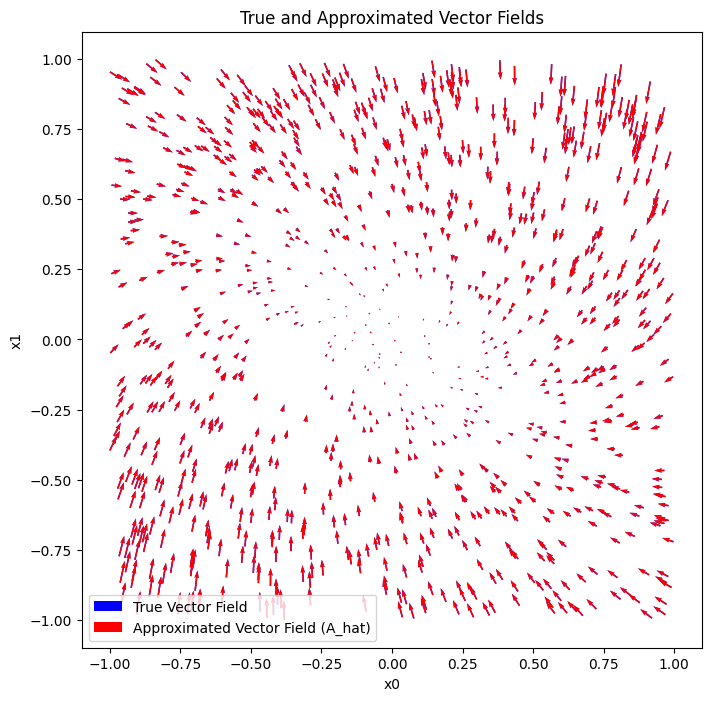

In [41]:
# Load datasets with space as the delimiter
x0_data = np.loadtxt('../data/linear_vectorfield_data_x0.txt')
x1_data = np.loadtxt('../data/linear_vectorfield_data_x1.txt')

# Estimate vectors v(k) using finite-difference formula
delta_t = 0.1
v_estimated = (x1_data - x0_data) / delta_t

# Prepare input data for supervised learning
X = x0_data
F = v_estimated

# Use least-squares minimization to approximate matrix A
A_hat = np.linalg.lstsq(X, F, rcond=None)[0]

# Display the estimated matrix A
print("Estimated Matrix A:")
print(A_hat)

# Visualize the vector field and its approximation
plt.figure(figsize=(8, 8))
plt.quiver(x0_data[:, 0], x0_data[:, 1], v_estimated[:, 0], v_estimated[:, 1], color='blue', label='True Vector Field')
plt.quiver(x0_data[:, 0], x0_data[:, 1], X @ A_hat[:, 0], X @ A_hat[:, 1], color='red', label='Approximated Vector Field (A_hat)')
plt.title('True and Approximated Vector Fields')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()


In [42]:
# Define the linear system function
def linear_system(t, x, A):
    return A.dot(x)

# Solve the linear system for each initial point
Tend = delta_t  # Integration time up to delta_t
x1_estimates = []

for k in range(len(x0_data)):
    # Initial condition
    x0_k = x0_data[k, :]
    
    # Solve the linear system using solve_ivp
    solution = solve_ivp(linear_system, (0, Tend), x0_k, args=(A_hat,))

    # Extract the solution at Tend
    x1_estimate_k = solution.y[:, -1]
    x1_estimates.append(x1_estimate_k)

# Convert the list to a numpy array
x1_estimates = np.array(x1_estimates)

# Compute the mean squared error
mse = np.mean(np.sum((x1_estimates - x1_data)**2, axis=1))

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0030599275959897346


Eigenvalues of A:  [-0.72546409+0.23191149j -0.72546409-0.23191149j]


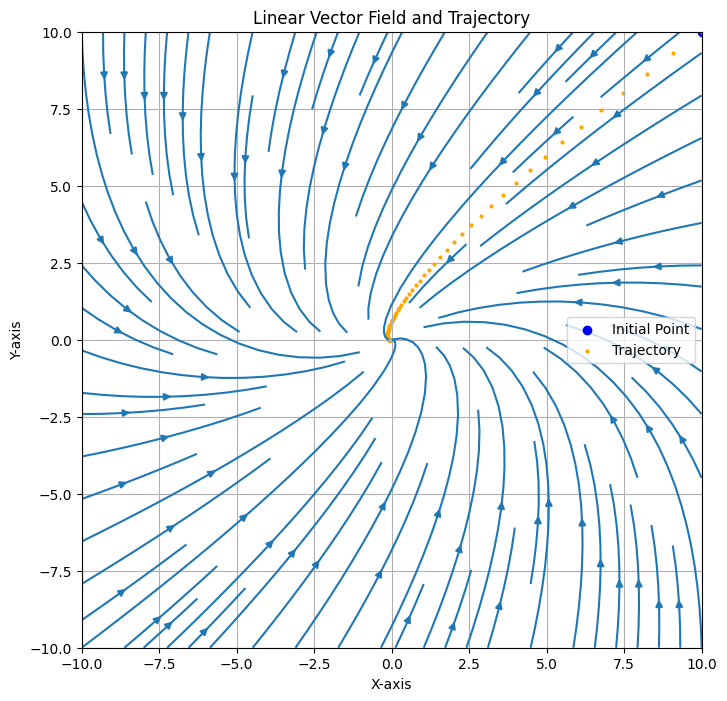

In [43]:
def linear_approx(t, y, A):
    return A @ y

# Define width and grid for plotting
w = 10
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

# Calculate eigenvalues of A_hat
eigenvalues = np.linalg.eigvals(A_hat)
print("Eigenvalues of A: ", eigenvalues)

# Compute linear vector field A_hat * [X, Y]
UV = A_hat @ np.row_stack([X.ravel(), Y.ravel()])
U = UV[0, :].reshape(X.shape)
V = UV[1, :].reshape(X.shape)

# Plot linear vector field
fig = plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, U, V, density=1.0)

# Solve the initial value problem using solve_ivp
sol = solve_ivp(linear_approx, [0, 100], [10, 10], t_eval=np.linspace(0, 100, 1000), args=[A_hat])

# Plot the initial point and the trajectory
plt.scatter(10, 10, c='blue', label='Initial Point')
plt.scatter(sol.y[0, :], sol.y[1, :], c='orange', s=4, label='Trajectory')
plt.legend()

# Set plot parameters
plt.rcParams["figure.figsize"] = (14, 14)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Linear Vector Field and Trajectory')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()
